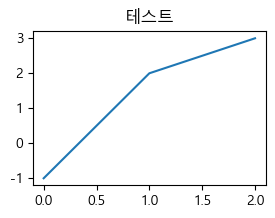

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------
# 한글 폰트 설정
# ---------------------------------------

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))

# ---------------------------------------
# 그래프 전역 크기 설정
# ---------------------------------------
plt.rc('figure', figsize=(12,5))

pass


## 데이터 수집

- 시간대별 산불현황 데이터
    - https://kosis.kr/statHtml/statHtml.do?sso=ok&returnurl=https%3A%2F%2Fkosis.kr%3A443%2FstatHtml%2FstatHtml.do%3Fconn_path%3DMT_ZTITLE%26list_id%3DC_12%26obj_var_id%3D%26seqNo%3D%26tblId%3DTX_13625_A007%26vw_cd%3DMT_ZTITLE%26itm_id%3D%26language%3Dkor%26lang_mode%3Dko%26orgId%3D136%26

## 시간대별 산불 발생 현황

In [10]:
# ----------------------------------
# 컬러 지정
# ----------------------------------

time_colors = {
    '오전(6~10시)': '#A3D9FF',   
    '정오(11~13시)': '#FFD966',   
    '오후(14~18시)': '#FF9F68',   
    '야간(19~05시)': '#3B3B98'    
}

In [ ]:
# ----------------------------------
# 데이터프레임 생성
# ----------------------------------
data_file = 'data/산불데이터/시간대별_산불발생_현황_20250406142005.csv'
df_time = pd.read_csv(data_file, encoding='cp949', header=1)
df_time.head()

,시점,오전(6~10시),정오(11~13시),오후(14~18시),야간(19~05시)
0,1997,31,193,256,44
1,1998,11,72,144,38
2,1999,14,110,150,41
3,2000,24,153,456,96
4,2001,58,287,333,107


In [ ]:
# ----------------------------------
# 인덱스라벨 설정
#   - 시점
# ----------------------------------

df_time = df_time.set_index('시점')
df_time.head()

,오전(6~10시),정오(11~13시),오후(14~18시),야간(19~05시)
시점,,,,
1997,31,193,256,44
1998,11,72,144,38
1999,14,110,150,41
2000,24,153,456,96
2001,58,287,333,107


In [14]:
# ----------------------------------
# 시간별 평균 산불 팔생 현황 집계
# ----------------------------------

time_mean = df_time.mean()
time_mean

오전(6~10시)      33.607143
정오(11~13시)    162.392857
오후(14~18시)    223.964286
야간(19~05시)     56.071429
dtype: float64

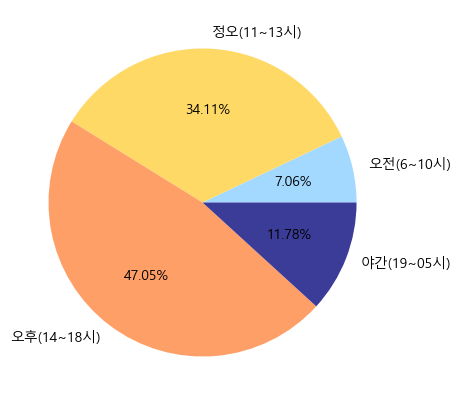

In [15]:
# ----------------------------------
# 시각화
# ----------------------------------

colors = [time_colors[label] for label in time_mean.index]
plt.pie(time_mean.values,
        labels = time_mean.index,
        autopct='%.2f%%',
        colors=colors)
pass

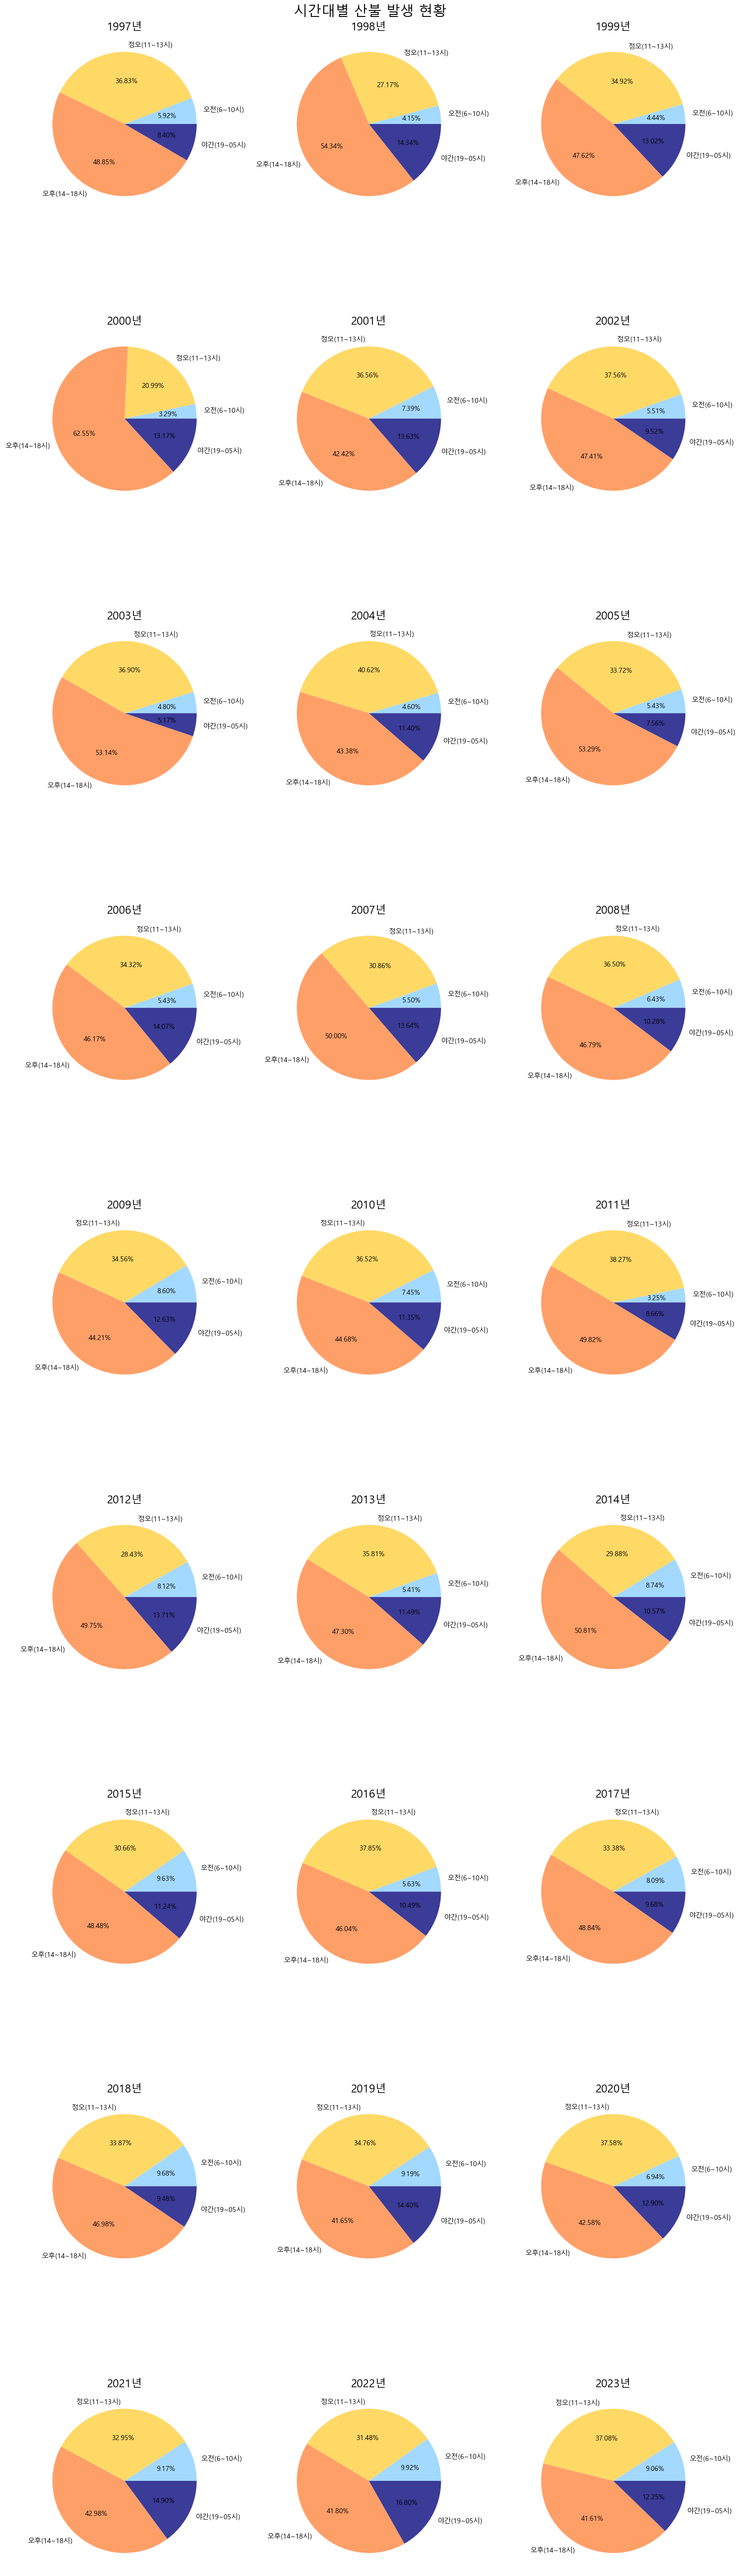

In [16]:
# ----------------------------------
# 연도별 시각화
# ----------------------------------

fig, axes = plt.subplots(10,3,
                         figsize=(15,60))

axes_flat = axes.flatten()


for i, year in enumerate(df_time.index):
    data = df_time.loc[year, :]
    labels = data.index
    colors = [time_colors[label] for label in data.index]
    axes_flat[i].pie(data,
                     labels=labels,
                     autopct='%.2f%%',
                     colors=colors)
    axes_flat[i].set_title(f'{year}년', fontsize=16)


for j in range(i,len(axes_flat)):
    fig.delaxes(axes_flat[j])

fig.suptitle('시간대별 산불 발생 현황', fontsize=20)
fig.tight_layout()
